# Final Project of 3014 - Introduction to Artificial Intelligence

In this project, we aim to build a model capable of pedicting the body weight of newly born babies. For this we took a dataset from *****Kaggle***** and the link for the dataset is: https://www.kaggle.com/datasets/des137/us-births-2018

The dataset has the data related to the birth happening at USA in year 2018. It has 55 features and the features are very hard to understand as the dataset has the feature-names that are not in understandable form. So, here are the meanings of each feature-name in the dataset:
***
1. ATTEND - Attendant at Birth
2. BFACIL - Birth Place
3. BMI - Body Mass Index
4. CIG_0 - Cigarettes Before Pregnancy
5. DBWT - Birth Weight
6. DLMP_MM - Last Normal Menses Month
7. DLMP_YY - Last Normal Menses Year
8. DMAR - Marital Status
9. DOB_MM - Birth Month
10. DOB_TT - Time of Birth
11. DOB_WK - Birth Day of Week
12. DOB_YY - Birth Year
13. DWgt_R - Delivery Weight Recode
14. FAGECOMB - Father’s Combined Age
15. FEDUC - Father’s Education
16. FHISPX - Father’s Hispanic Origin
17. FRACE15 - Father’s Race Recode 15
18. FRACE31 - Father’s Race Recode 31
19. FRACE6 - Father’s Race Recode 6
20. ILLB_R - Interval Since Last Live Birth Recode
21. ILOP_R - Interval Since Last Other Pregnancy Recode
22. ILP_R - Interval Since Last Pregnancy Recode
23. IMP_SEX - Imputed Sex
24. IP_GON - Gonorrhea
25. LD_INDL - Induction of Labor
26. MAGER - Mother’s Single Years of Age
27. MAGE_IMPFLG - Mother’s Age Imputed
28. MAR_IMP - Mother’s Marital Status Imputed
29. MBSTATE_REC -  Mother’s Nativity
30. MEDUC - Mother’s Education
31. MHISPX - Mother’s Hispanic Origin
32. MM_AICU - Admit to Intensive Care
33. MRACE15 - Mother’s Race Recode 15
34. MRACE31 - Mother’s Race Recode 31
35. MRACEIMP - Mother’s Race Imputed Flag
36. MRACE6 - Mother’s Race Recode 6
37. MTRAN - Mother Transferred
38. M_Ht_In -  Mother’s Height in Total Inches
39. NO_INFEC - No Infections Reported
40. NO_MMORB - No Maternal Morbidity Reported
41. NO_RISKS - No Risk Factors Reported
42. PAY - Payment Source for Delivery
43. PAY_REC - Payment Recode
44. PRECARE - Month Prenatal Care Began
45. PREVIS - Number of Prenatal Visits
46. PRIORDEAD - Prior Births Now Dead
47. PRIORLIVE - Prior Births Now Living
48. PRIORTERM - Prior Other Terminations
49. PWgt_R - Pre-pregnancy Weight Recode
50. RDMETH_REC - Delivery Method Recode
51. RESTATUS - Residence Status
52. RF_CESAR - Previous Cesarean
53. RF_CESARN - Number of Previous Cesareans
54. SEX - Sex of Infant
55. WTGAIN - Weight Gain
***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
birth_df = pd.read_csv('C:/US_births(2018).csv')
birth_df

C:\Users\bhawa\AppData\Local\Temp\ipykernel_11052\1327548220.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  birth_df = pd.read_csv('C:/US_births(2018).csv')


,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801529,1,1,26.3,0,2140,4,2018,2,12,1531,...,0,1,0,168,4,1,Y,1,M,47
3801530,1,1,32.4,0,3560,3,2018,2,12,2347,...,0,2,1,195,1,1,N,0,M,10
3801531,5,7,27.6,0,3367,3,2018,2,11,1354,...,0,5,1,156,1,1,N,0,F,22
3801532,5,4,99.9,98,320,3,2018,2,8,859,...,0,0,0,999,5,1,U,99,M,99


# Data Cleaning #

In [5]:
birth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801534 entries, 0 to 3801533
Data columns (total 55 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ATTEND       int64  
 1   BFACIL       int64  
 2   BMI          float64
 3   CIG_0        int64  
 4   DBWT         int64  
 5   DLMP_MM      int64  
 6   DLMP_YY      int64  
 7   DMAR         object 
 8   DOB_MM       int64  
 9   DOB_TT       int64  
 10  DOB_WK       int64  
 11  DOB_YY       int64  
 12  DWgt_R       int64  
 13  FAGECOMB     int64  
 14  FEDUC        int64  
 15  FHISPX       int64  
 16  FRACE15      int64  
 17  FRACE31      int64  
 18  FRACE6       int64  
 19  ILLB_R       int64  
 20  ILOP_R       int64  
 21  ILP_R        int64  
 22  IMP_SEX      object 
 23  IP_GON       object 
 24  LD_INDL      object 
 25  MAGER        int64  
 26  MAGE_IMPFLG  object 
 27  MAR_IMP      object 
 28  MBSTATE_REC  int64  
 29  MEDUC        int64  
 30  MHISPX       int64  
 31  MM_AICU      object 
 32

In [6]:
birth_df.isnull().sum() # it shows the count of null values in the data

ATTEND         0
BFACIL         0
BMI            0
CIG_0          0
DBWT           0
DLMP_MM        0
DLMP_YY        0
DMAR           0
DOB_MM         0
DOB_TT         0
DOB_WK         0
DOB_YY         0
DWgt_R         0
FAGECOMB       0
FEDUC          0
FHISPX         0
FRACE15        0
FRACE31        0
FRACE6         0
ILLB_R         0
ILOP_R         0
ILP_R          0
IMP_SEX        0
IP_GON         0
LD_INDL        0
MAGER          0
MAGE_IMPFLG    0
MAR_IMP        0
MBSTATE_REC    0
MEDUC          0
MHISPX         0
MM_AICU        0
MRACE15        0
MRACE31        0
MRACEIMP       0
MRAVE6         0
MTRAN          0
M_Ht_In        0
NO_INFEC       0
NO_MMORB       0
NO_RISKS       0
PAY            0
PAY_REC        0
PRECARE        0
PREVIS         0
PRIORDEAD      0
PRIORLIVE      0
PRIORTERM      0
PWgt_R         0
RDMETH_REC     0
RESTATUS       0
RF_CESAR       0
RF_CESARN      0
SEX            0
WTGAIN         0
dtype: int64

In [7]:
# filling the missing values in the dataframe with most comman values in the columns
most_common = birth_df.mode().iloc[0]
birth_df = birth_df.fillna(most_common)
birth_df.isnull().sum()

ATTEND         0
BFACIL         0
BMI            0
CIG_0          0
DBWT           0
DLMP_MM        0
DLMP_YY        0
DMAR           0
DOB_MM         0
DOB_TT         0
DOB_WK         0
DOB_YY         0
DWgt_R         0
FAGECOMB       0
FEDUC          0
FHISPX         0
FRACE15        0
FRACE31        0
FRACE6         0
ILLB_R         0
ILOP_R         0
ILP_R          0
IMP_SEX        0
IP_GON         0
LD_INDL        0
MAGER          0
MAGE_IMPFLG    0
MAR_IMP        0
MBSTATE_REC    0
MEDUC          0
MHISPX         0
MM_AICU        0
MRACE15        0
MRACE31        0
MRACEIMP       0
MRAVE6         0
MTRAN          0
M_Ht_In        0
NO_INFEC       0
NO_MMORB       0
NO_RISKS       0
PAY            0
PAY_REC        0
PRECARE        0
PREVIS         0
PRIORDEAD      0
PRIORLIVE      0
PRIORTERM      0
PWgt_R         0
RDMETH_REC     0
RESTATUS       0
RF_CESAR       0
RF_CESARN      0
SEX            0
WTGAIN         0
dtype: int64

In [8]:
# Finding the duplicate rows in the dataframe
duplicates = birth_df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 36


In [9]:
# Remove duplicate rows, keeping the first occurrence
birth_df_unique = birth_df.drop_duplicates()
birth_df_unique

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801529,1,1,26.3,0,2140,4,2018,2,12,1531,...,0,1,0,168,4,1,Y,1,M,47
3801530,1,1,32.4,0,3560,3,2018,2,12,2347,...,0,2,1,195,1,1,N,0,M,10
3801531,5,7,27.6,0,3367,3,2018,2,11,1354,...,0,5,1,156,1,1,N,0,F,22
3801532,5,4,99.9,98,320,3,2018,2,8,859,...,0,0,0,999,5,1,U,99,M,99


In [10]:
def detect_outliers(df):
    outlier_indices = []
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = list(set(outlier_indices))  # Remove duplicates
    return df.loc[outlier_indices]


In [11]:
outliers = detect_outliers(birth_df_unique)
outliers


,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801529,1,1,26.3,0,2140,4,2018,2,12,1531,...,0,1,0,168,4,1,Y,1,M,47
3801530,1,1,32.4,0,3560,3,2018,2,12,2347,...,0,2,1,195,1,1,N,0,M,10
3801531,5,7,27.6,0,3367,3,2018,2,11,1354,...,0,5,1,156,1,1,N,0,F,22
3801532,5,4,99.9,98,320,3,2018,2,8,859,...,0,0,0,999,5,1,U,99,M,99


In [12]:
birth_df_cleaned = birth_df_unique.drop(index=outliers.index)
birth_df_cleaned

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
7,1,1,28.2,0,3230,3,2017,1,1,1615,...,0,0,0,180,3,1,N,0,F,29
9,1,1,19.8,0,3430,4,2017,1,1,1111,...,0,0,0,134,1,1,N,0,F,30
20,1,1,25.5,0,3900,3,2017,1,1,114,...,0,2,0,153,1,1,N,0,F,33
27,1,1,21.3,0,3495,3,2017,1,1,750,...,0,0,0,124,1,1,N,0,M,14
54,1,1,27.4,0,3490,4,2017,1,1,321,...,0,0,0,175,1,1,N,0,F,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801487,1,1,26.6,0,3340,3,2018,1,12,633,...,0,0,0,155,1,1,N,0,M,10
3801493,1,1,22.5,0,3160,3,2018,1,12,2132,...,0,1,0,135,1,1,N,0,F,32
3801512,1,1,23.4,0,2800,4,2018,1,12,716,...,0,1,0,132,1,1,N,0,F,20
3801518,1,1,26.5,0,3095,3,2018,1,12,1004,...,0,1,0,145,1,1,N,0,F,39


# Data Exploration/Visualization #

In [13]:
# Calculating mean birth weight for each group
mean_dbwt_by_bmi = birth_df_cleaned.groupby('BMI')['DBWT'].mean()
mean_dbwt_by_cig_0 = birth_df_cleaned.groupby('CIG_0')['DBWT'].mean()
mean_dbwt_by_feduc = birth_df_cleaned.groupby('FEDUC')['DBWT'].mean()
mean_dbwt_by_meduc = birth_df_cleaned.groupby('MEDUC')['DBWT'].mean()

# Displaying the results
print("Mean Birth Weight by BMI:")
print(mean_dbwt_by_bmi)
print("\nMean Birth Weight by Cigarettes Before Pregnancy:")
print(mean_dbwt_by_cig_0)
print("\nMean Birth Weight by Father's Education:")
print(mean_dbwt_by_feduc)
print("\nMean Birth Weight by Mother's Education:")
print(mean_dbwt_by_meduc)

Mean Birth Weight by BMI:
BMI
13.1    2417.000000
13.2    2875.500000
13.3    3202.166667
13.4    2769.000000
13.5    3317.000000
           ...     
43.9    3238.700000
44.0    3221.621622
44.1    3364.194690
44.2    3495.388889
44.3    3323.882353
Name: DBWT, Length: 312, dtype: float64

Mean Birth Weight by Cigarettes Before Pregnancy:
CIG_0
0    3346.964963
Name: DBWT, dtype: float64

Mean Birth Weight by Father's Education:
FEDUC
1    3289.855528
2    3245.937823
3    3304.250319
4    3341.422164
5    3368.662742
6    3382.322354
7    3386.963609
8    3370.100668
9    3285.017748
Name: DBWT, dtype: float64

Mean Birth Weight by Mother's Education:
MEDUC
1    3272.899823
2    3222.723910
3    3291.072690
4    3326.440224
5    3356.294502
6    3384.876126
7    3375.656964
8    3356.711391
9    3316.802090
Name: DBWT, dtype: float64


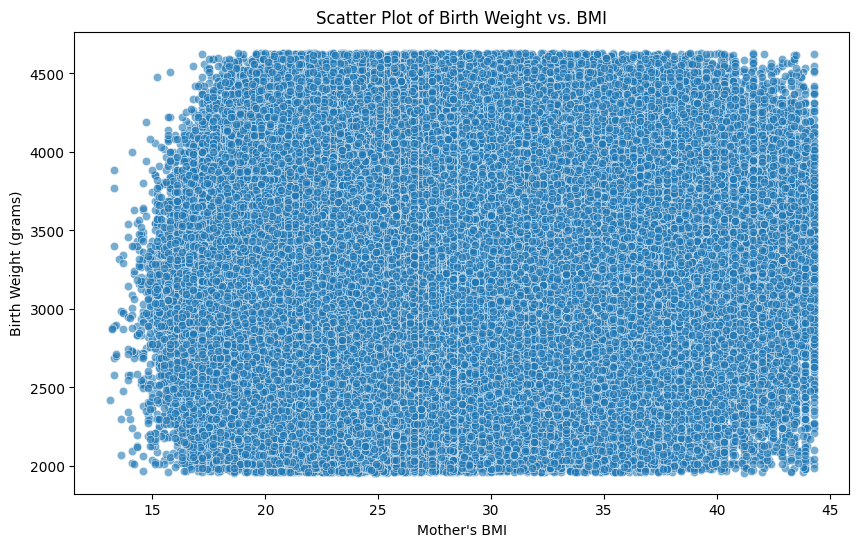

In [14]:
#scatter plot for BMI vs. DBWT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=birth_df_cleaned, x='BMI', y='DBWT', alpha=0.6)
plt.title('Scatter Plot of Birth Weight vs. BMI')
plt.xlabel('Mother\'s BMI')
plt.ylabel('Birth Weight (grams)')
plt.show()